来自我们伟大的李沐大大的作品[《动手学深度学习》](https://zh.d2l.ai/index.html)



## 1. 数据操作
首先需要了解n维数组，即张量（tensor）。
- 0维张量：标量（scalar）
- 1维张量：向量（vector）
- 2维张量：矩阵（matrix）
- 3维及以上：高阶张量

无论使用哪个深度学习框架，它的张量类都与Numpy的ndarray类似。 但深度学习框架又比Numpy的ndarray多一些重要功能：
- 首先，GPU很好地支持加速计算，而NumPy仅支持CPU计算； 
- 其次，张量类支持自动微分。 这些功能使得张量类更适合深度学习。 

In [8]:
import torch

#  arange 创建一个行向量 x
x = torch.arange(12)
print(x)

x_float = torch.arange(12, dtype=torch.float32)
print(x_float)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])


然后是常见的张量属性方法：
- shape：张量的形状
- size()：张量的元素总数
- numel()：张量的元素总数
- dtype：张量的数据类型
- device：张量所在的设备（CPU或GPU）

In [10]:
print(x.shape)
print(x.size())
print(x.numel())
# 因为 x.size() 返回的是一个元组，而 x.numel() 返回的是一个整数


torch.Size([12])
torch.Size([12])
12


接着来重塑张量形状：

In [13]:
x = x.reshape(3, 4)
print(x)
# reshape 方法返回的是一个新的张量，而不是修改原张量
# 所以可以用 -1 来表示自动计算维度
x = x.reshape(-1, 4) # 自动计算行数，列数为 4
print(x)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


还有一些特殊张量的创建方法：
- torch.zeros()：创建一个全零张量
- torch.ones()：创建一个全一张量
- torch.rand()：创建一个随机张量，元素值在 [0, 1) 之间
- torch.randn()：创建一个随机张量，元素值服从标准正态分布

In [16]:
zeros = torch.zeros((2, 3, 4)) # 这里面的 2 表示有 2 个 3x4 的张量
print(zeros)

ones = torch.ones((1, 2, 3))
randn = torch.randn(3, 4) # 3x4 的随机张量，元素值服从标准正态分布
print(ones)
print(randn)
# 注意到了吗？默认数据类型不再是arange的int64了，而是float32
# 这是因为 PyTorch 默认使用 float32 来存储张量，而不是 int64
# 这是为了在 GPU 上进行计算时，能够利用 GPU 的并行计算能力
# 同时也能够在内存中存储更多的张量，因为 float32 占用的内存空间是 int64 的一半

custom1 = torch.tensor([[1,2,3,4],
                        [5,6,7,8]])
print(custom1)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.]]])
tensor([[ 0.6482, -1.0655,  0.4264, -0.4272],
        [ 0.2144,  0.3368,  0.1298, -0.2877],
        [-0.7720,  0.0856,  0.4788,  0.6535]])
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


### 1.1 运算符
张量的数学运算，首先是元素级别的运算，例如加减乘除、取余、取整等。
#### 1.1.1 按元素运算（elementwise operation）

In [21]:
x = torch.tensor([1.2, 3, 4, -8])
y = torch.tensor([2, 2, -2, 2,])
print(x+y, x-y, x*y, x/y, x**y) # 加减乘除、取余、取整等
# 显然形状维度必须一致
# 除此之外我们还有一些一元运算符
print(x.abs(), x.sqrt(), x.exp(), x.log())

tensor([ 3.2000,  5.0000,  2.0000, -6.0000]) tensor([ -0.8000,   1.0000,   6.0000, -10.0000]) tensor([  2.4000,   6.0000,  -8.0000, -16.0000]) tensor([ 0.6000,  1.5000, -2.0000, -4.0000]) tensor([1.4400e+00, 9.0000e+00, 6.2500e-02, 6.4000e+01])
tensor([1.2000, 3.0000, 4.0000, 8.0000]) tensor([1.0954, 1.7321, 2.0000,    nan]) tensor([3.3201e+00, 2.0086e+01, 5.4598e+01, 3.3546e-04]) tensor([0.1823, 1.0986, 1.3863,    nan])


#### 1.1.2 张量连结（Concatenation）

In [29]:
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
y = torch.tensor([[2, 1, 4, 3],
                  [1, 2, 3, 4],
                  [4, 3, 2, 1]])
print(x)
result_row = torch.cat((x, y), dim=0)# 按行连结
result_col = torch.cat((x, y), dim=1)# 按列连结
print(result_row)
print(result_col)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])
tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


#### 1.1.3 逻辑运算

In [ ]:
print(x>y)
print(x is y) # 内存地址是否相同
print(x == y) # 逐元素是否相等

tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])
False
tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])


#### 1.1.4 张量求和

In [ ]:
print(x.sum())
print(x.sum(dim=0)) # 按列求和(行维度叠起来)
print(x.sum(dim=1)) # 按行求和

tensor(66.)
tensor([12., 15., 18., 21.])
tensor([ 6., 22., 38.])


### 1.2 广播（Broadcasting）
当两个张量形状不同时，PyTorch会自动拓展较小的张量，通过适当复制元素使它们的形状相同。
1. 从最后一个维度开始向前比较
2. 如果两个维度相等，或者其中一个维度为1，则认为这两个维度是兼容的，可以广播
3. 如果维度缺失，则在缺失的维度上拓展为1，使两个张量的形状相同

在下面的例子中：
```python
a: [[0],   -> 扩展为 [[0, 0],
     [1],             [1, 1],
     [2]]            [2, 2]]
     
b: [[0, 1]] -> 扩展为 [[0, 1],
                      [0, 1],
                      [0, 1]]
```

In [ ]:
a = torch.arange(3).reshape(3,1)
# a1 = torch.arange(3).reshape((3,1)) # 与a相同
print(a)
b = torch.arange(2).reshape(1,2)
print(b)
result = a + b
print(result)

# 计算x + y显然是无法广播的
# x = torch.tensor([1.2, 3, 4, -8])
# y = torch.tensor([2, 2, -2, 2, 0])
# 但是我们可以将x和y都拓展为(最后结果)3x5的张量，然后进行计算
# x = x.reshape(3,1)
# y = y.reshape(1,5)
# result = x + y


tensor([[0],
        [1],
        [2]])
tensor([[0, 1]])
tensor([[0, 1],
        [1, 2],
        [2, 3]])


### 1.3 索引与切片
 与任何Python数组一样：第一个元素的索引是0，最后一个元素索引是-1； 可以指定范围以包含第一个元素和最后一个之前的元素。

如下所示，我们可以用[-1]选择最后一个元素，可以用[1:3]选择第二个和第三个元素（左闭右开）

In [ ]:
X = torch.arange(12).reshape(3,4)
print(X)
# 访问单个元素
print(X[1, 2])

# 访问整行
print(X[1]) # print(X[1, :])一样的

# 切片操作
print(X[:, 2]) # 第三列
print(X[1, 2:4]) # 第二行，第三列到第四列（左闭右开）

# 修改单个元素
X[1, 2] = 9
print(X)

# 修改区域元素
X[0:2, :] = 12 # X[0:2, ] = 12也行，冒号可加可不加，全选嘛
print(X)


tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor(6)
tensor([4, 5, 6, 7])
tensor([ 2,  6, 10])
tensor([6, 7])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])
tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])


Tensor的索引和切片与List非常相似，不过
| 特性         | Tensor               | List                     |
|--------------|----------------------|--------------------------|
| 基础索引     | ✅ tensor[0]         | ✅ list[0]               |
| 负索引       | ✅ tensor[-1]        | ✅ list[-1]              |
| 多维索引     | ✅ tensor[1, 2]      | ❌ 需要 list[1][2]       |
| 多维切片     | ✅ tensor[:, 1:3]    | ❌ 需要循环              |
| 布尔索引     | ✅ tensor[tensor > 5]| ❌ 不支持                |
| 花式索引     | ✅ tensor[[0, 2, 1]] | ❌ 有限支持              |
| 步长切片     | ✅ tensor[::2]       | ✅ list[::2]             |
| 省略号       | ✅ tensor[..., 0]    | ❌ 不支持                |
| 原地修改     | ✅ tensor[:] = 0     | ✅ list[:] = [0]*len(list)|

此外，Tensor的索引和切片还支持更多的操作，比如：
- 广播索引：可以使用广播规则来索引多个张量，例如 tensor[:, None] + tensor[None, :] 可以得到一个新的张量，其中每个元素都是两个张量对应位置元素的和。
- 视图索引：可以使用视图操作来创建一个新的张量，该张量与原始张量共享数据，但具有不同的形状。例如，tensor.view(2, 6) 可以将一个 12 元素的张量转换为一个 2x6 的张量。
- 掩码索引：可以使用布尔掩码来索引张量，例如 tensor[tensor > 0] 可以得到一个新的张量，其中只包含原始张量中大于 0 的元素。
- 省略号索引：可以使用省略号（...）来表示多个维度，例如 tensor[..., 0] 可以表示最后一个维度为 0 的元素。
- 步长切片（支持负步长）：可以使用步长来跳过元素，例如 tensor[::2] 可以表示选择每隔一个元素，而 tensor[::-1] 可以表示将张量反转；tensor[::2, ::2] 行和列都每隔一个取一个

### 1.4 节省内存
运行一些操作可能会导致为新结果分配内存。 例如，如果我们用Y = X + Y，我们将取消引用Y指向的张量，而是指向新分配的内存处的张量。

In [47]:
before = id(b)
b = b + a
id(b) == before


False

解决方法有两个：
1. 原地操作
2. 切片操作

In [ ]:
z = torch.zeros_like(y) # 创建与y形状相同的全零张量
# print(z)
print(id(z))
z[:] = x + y # 使用[:]进行原地赋值
print(z)
print(id(z))

x_copy = x.clone()         # 创建x的副本用于演示
print("\nx_copy的id:", id(x_copy))
x_copy += y                # 原地加法运算符
print("+=运算后id:", id(x_copy))
print("id是否相同:", id(x_copy) == id(x_copy))  # True


1448004864176
tensor([[ 2,  2,  6,  6],
        [ 5,  7,  9, 11],
        [12, 12, 12, 12]])
1448004864176

x_copy的id: 1448004688848
+=运算后id: 1448004688848
id是否相同: True


### 1.5 张量与数组转换
张量转换为NumPy张量（ndarray）很容易，反之也同样容易。 torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量。

In [55]:
import numpy as np
NP = x.numpy()
print(type(x), type(NP))

ts = torch.tensor(NP)
print(type(ts))


# 当然还有标量的转换
w = torch.tensor([3.5])
w.item()

<class 'torch.Tensor'> <class 'numpy.ndarray'>
<class 'torch.Tensor'>


3.5

## 2. 数据预处理
### 2.1 读取数据集

In [61]:
# 先创建一个模拟的房屋数据集：
import os
import torch
import pandas as pd

with open(os.path.join('house.csv'), 'w') as f:
    f.write('Price,Area,Rooms,Bathrooms\n')
    f.write('100000,150,3,2\n')
    f.write('150000,200,4,3\n')
    f.write('120000,120,2,2\n')

data = pd.read_csv('house.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      3 non-null      int64
 1   Area       3 non-null      int64
 2   Rooms      3 non-null      int64
 3   Bathrooms  3 non-null      int64
dtypes: int64(4)
memory usage: 224.0 bytes
None


### 2.2 处理缺失值
为了处理NaN，典型的方法包括插值法和删除法。
其中插值法用一个替代值弥补缺失值，而删除法则直接忽略缺失值。

在这里，我们将考虑插值法：
通过位置索引iloc，我们将data分成inputs和outputs， 其中前者为data的前两列，而后者为data的最后一列。 对于inputs中缺少的数值，我们用同一列的均值替换“NaN”项。

### 2.3 转化为张量

## 3. 线性代数
### 3.1 标量与向量
标量由只有一个元素的张量表示，而通过一维张量表示向量
- 看 “元素个数”→ 用len(x)（向量）或x.numel()（任意张量）；
- 看 “张量结构（轴的长度）”→ 用x.shape；
- 看 “张量有多少个轴”→ 用x.ndim（多数框架支持）；
- 看到 “维度” 先问：是说 “轴数”，还是 “轴的长度”？


In [2]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 3.2 张量算法
#### 3.2.1 逐元素相乘
直接通过`A * B`得到的是两个矩阵的逐元素乘法称为Hadamard积（Hadamard product）
#### 3.2.2 张量求和
还能通过`x.sum()`对张量中的所有元素求和
- 默认情况下，调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量
- 可以指定张量沿哪一个轴来通过求和降低维度，如`x.sum(axis=0)`表示沿轴0（行）求和，`x.sum(axis=1)`表示沿轴1（列）求和，`A.sum(axis=[0, 1]) == A.sum()`
- `A.sum(axis=1, keepdims=True)`表示沿轴1（列）求和，保持原始维度，结果为一个列向量
- `A.cumsum(axis=0)`表示沿轴0（行）求累计和，结果为一个与A形状相同的张量
#### 3.2.3 张量平均
平均值方面，`x.mean()`或`x.sum() / x.numel()`
- numel() 的全称是 **number of elements**，核心含义是 “张量的元素总数”
- 可以指定张量沿哪一个轴来通过求和降低维度，如`x.mean(axis=0)`表示沿轴0（行）求平均值，`x.mean(axis=1)`表示沿轴1（列）求平均值，`A.mean(axis=[0, 1]) == A.mean()`
- 非降维求和（`keepdims=True`），暂时不知道有啥用，可能更方便广播运算吧
- 累积求和（`cumsum(axis=0)`），与`sum`类似，但是返回的是一个与输入张量形状相同的张量，每个元素都是从第一个元素开始到当前元素的累计和，沿指定轴累积求和
- 累积求积（`cumprod(axis=0)`），与`prod`类似，但是返回的是一个与输入张量形状相同的张量，每个元素都是从第一个元素开始到当前元素的累计积，沿指定轴累积求积
#### 3.2.4 点积
点积（dot product）是两个向量的内积，结果是一个标量
- 数学表达为 $x^T y$
- 可以通过`torch.dot(x, y)`或`x @ y`计算点积
- `torch.dot(x, y) == (x * y).sum()`
#### 3.2.5 矩阵向量积
矩阵向量积（matrix-vector product）是一个矩阵和一个向量的乘积，结果是一个向量
- 数学表达为 $Ax$
- 通过`torch.mv(A, x)`或`A @ x`计算矩阵向量积
- 线代热知识：A的列维数（即A的宽度）必须与x的维数（即x的长度）相等
#### 3.2.6 矩阵矩阵积
矩阵矩阵积（matrix-matrix product）是两个矩阵的乘积，结果是一个矩阵
- 数学表达为 $AB$
- 通过`torch.mm(A, B)`或`A @ B`计算矩阵矩阵积
#### 3.2.7 范数
范数（norm）是一个函数，用于衡量向量的大小或长度
- 数学表达为 $||x||$
- 可以通过`torch.norm(x)`计算向量的范数
- 默认情况下，计算的是L2范数（欧氏范数），即$||x||_2 = \sqrt{\sum_{i=1}^n x_i^2}$
- 可以指定参数`p`来计算其他范数，如`torch.norm(x, p=1)`或`torch.abs(x).sum()`计算L1范数（曼哈顿范数），即$||x||_1 = \sum_{i=1}^n |x_i|$
- 可以指定参数`dim`来计算指定轴上的范数，如`torch.norm(A, dim=0)`计算A的每一列的2范数，`torch.norm(A, dim=1)`计算A的每一行的2范数
- Frobenius范数（Frobenius norm）是矩阵的范数，用于衡量矩阵的大小或长度
- 数学表达为 $||A||_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n a_{ij}^2}$
- 可以通过`torch.norm(A, p='fro')`或`torch.sqrt((A * A).sum())`计算Frobenius范数


## 4. 微积分

### 4.1 梯度

当一个函数依赖多个变量时，偏导数描述的是：固定其他所有变量不变，只让一个变量变化时，函数的变化率

假设函数是 y = f(x₁, x₂, ..., xₙ)，那么

∂y/∂xᵢ 表示：固定 x₁,...,xᵢ₋₁,xᵢ₊₁,...,xₙ 为常数，只看 xᵢ 变化时，y 的变化率。

极限定义：∂xi​∂y​=limh→0​hf(x1​,…,xi−1​,xi​+h,xi+1​,…,xn​)−f(x1​,…,xi​,…,xn​)​这和单变量导数的定义几乎一样，只是多了 “固定其他变量” 的前提。

如果函数是 f(x, y) = x² + 3y

对 x 的偏导数：∂f/∂x = 2x（把 y 看作常数）

对 y 的偏导数：∂f/∂y = 3（把 x 看作常数）

而把函数对所有变量的偏导数，打包成一个向量，就是梯度。它代表了函数在当前点变化最快的方向和速率，是深度学习中梯度下降算法的核心。

对于函数 f: ℝⁿ → ℝ（输入是 n 维向量，输出是标量），梯度定义为：∇x​f(x)=[∂x1​∂f(x)​,∂x2​∂f(x)​,…,∂xn​∂f(x)​]T

梯度是一个n 维列向量，每个分量是函数对对应变量的偏导数；

符号 ∇ 读作 “nabla”，表示 “梯度算子”。

对于前面提到的函数 f(x, y) = x² + 3y，它的梯度是：

∇f(x, y) = [2x, 3]^T

当 x=1, y=2 时，梯度为 [2, 3]^T，这表示函数在该点沿 (2,3) 方向上升最快。

常用梯度公式

- ∇ₓ A x = Aᵀ（A 是矩阵，x 是向量）
- ∇ₓ xᵀ A = A
- ∇ₓ xᵀ A x = (A + Aᵀ)x（如果 A 是对称矩阵，简化为 2Ax）
- ∇ₓ ||x||² = 2x（向量的 L2 范数平方对自身的梯度）

### 4.2 自动微分

深度学习框架通过自动计算导数，即自动微分（automatic differentiation）来加快求导。 实际中，根据设计好的模型，系统会构建一个计算图（computational graph）， 来跟踪计算是哪些数据通过哪些操作组合起来产生输出。 自动微分使系统能够随后反向传播梯度。 这里，反向传播（backpropagate）意味着跟踪整个计算图，填充关于每个参数的偏导数。

In [ ]:
# 标量情况
x = torch.tensor([1., 2., 3., 4.], requires_grad=True) # 可以视为 “函数的采样点”
y = 2 * x * x  # y = 2x²

print("x:", x)
print("y = x²:", y)

# y.backward()  # RuntimeError: grad can be implicitly created only for scalar outputs
# 对标量求和后反向传播
y_sum = y.sum()  # 变成标量！！！
print("y_sum:", y_sum)

y_sum.backward()
print("dy/dx (对于x²的导数是2x):", x.grad)
# x.grad 就是标量输出对 x 每个采样点的偏导数（比如 y_sum 是 y 的求和
# y_sum 对 x_i 的偏导数就是 2x_i，所以 x.grad=[2,4,6,8]）

x: tensor([1., 2., 3., 4.], requires_grad=True)
y = x²: tensor([ 2.,  8., 18., 32.], grad_fn=<MulBackward0>)
y_sum: tensor(60., grad_fn=<SumBackward0>)
dy/dx (对于x²的导数是2x): tensor([ 4.,  8., 12., 16.])


当 y 是向量时，dy/dx 应该是一个矩阵（雅可比矩阵）
但深度学习中我们通常想要**每个样本的梯度之和**。
y.backward(torch.ones_like(y)) 相当于计算 ∑ᵢ dyᵢ/dx
y.sum().backward() 是等价的，且更常用。
计算图是 PyTorch 隐式构建的，sum 只是计算图的最后一步，不会让中间运算信息丢失
### 4.3 分离计算（detach）
假设我们有一个复杂的计算：
先计算 y = x²
然后用 y 计算 z = y * x = x³
但我们想要：计算 z 对 x 的梯度时，把 y 当作常数

In [ ]:
x.grad = None
y = x * x  # y = x²
z = y * x  # z = x³
z_sum = z.sum()  # 对 z 求和
z_sum.backward()
print("dz_sum/dx:", x.grad)

x.grad = None
u = y.detach() # u 变成常量tensor，u.requires_grad=False
# 把一个 tensor 从计算图中剥离，变成 “不可训练的常量”（相当于普通数字），后续对它的运算不再追踪梯度，也不会参与反向传播
z = u * x
z_sum = z.sum()
z_sum.backward()
print("dz_sum/dx:", x.grad) # 对 u 求导时，u 是常量，所以 dz_sum/dx = u * 1 = u

dz_sum/dx: tensor([ 3., 12., 27., 48.])
dz_sum/dx: tensor([ 1.,  4.,  9., 16.])


detach() 创建了一个新张量，值与原张量相同,但切断它和计算图的联系，没有计算历史，梯度不会通过它反向传播到它的来源
一般用在GAN里判别器训练时不影响生成器参数，或是GNN里只更新几个邻居节点
### 4.4 控制流梯度计算
即使函数有if、while等控制流，也能自动求导


C:\Users\bubblevan\AppData\Local\Temp\ipykernel_40444\1501230397.py:49: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bubblevan\AppData\Local\Temp\ipykernel_40444\1501230397.py:49: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bubblevan\AppData\Local\Temp\ipykernel_40444\1501230397.py:49: UserWarning: Glyph 23548 (\N{CJK UNIFIED IDEOGRAPH-5BFC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bubblevan\AppData\Local\Temp\ipykernel_40444\1501230397.py:49: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bubblevan\AppData\Local\Temp\ipykernel_40444\1501230397.py:49: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bubblevan\AppData\Local\Temp\ipykernel_40444\1501230397.py:49: Use

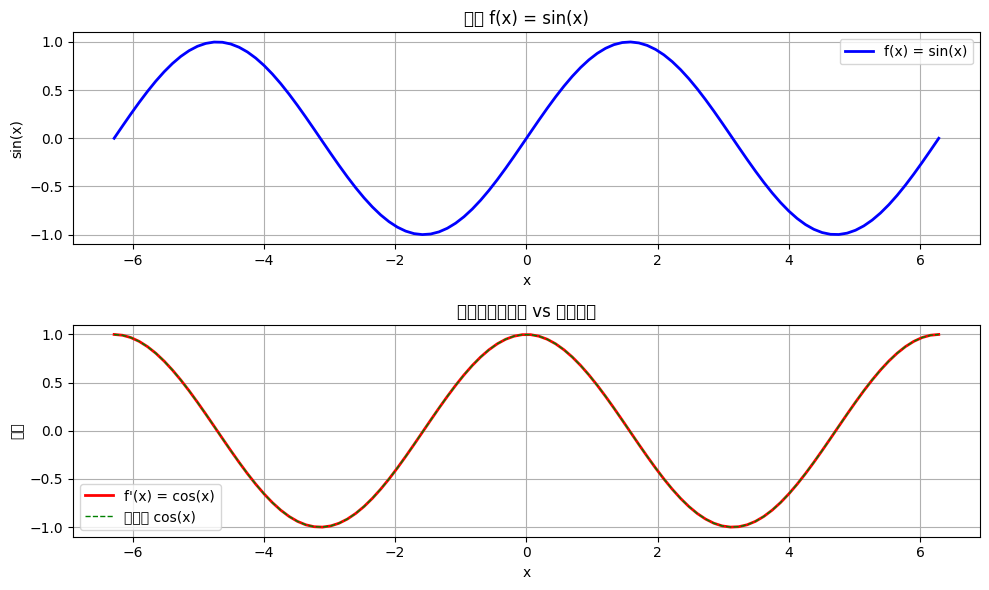

最大误差: 0.000000


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 练习：绘制 f(x)=sin(x) 和它的导数
def visualize_sin_derivative():
    # 创建x，从-2π到2π
    x = torch.linspace(-2*np.pi, 2*np.pi, 100, requires_grad=True)
    
    # 计算 sin(x)
    y = torch.sin(x)
    
    # 计算导数（不使用cos）
    # 方法：对每个x[i]单独计算梯度
    gradients = []
    for val in x:
        # 临时变量，需要梯度
        xi = torch.tensor([val.item()], requires_grad=True)
        yi = torch.sin(xi)
        yi.backward()
        gradients.append(xi.grad.item())
    
    gradients = torch.tensor(gradients)
    
    # 转换为numpy用于绘图
    x_np = x.detach().numpy()
    y_np = y.detach().numpy()
    grad_np = gradients.numpy()
    
    # 绘制
    plt.figure(figsize=(10, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(x_np, y_np, 'b-', linewidth=2, label='f(x) = sin(x)')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.title('函数 f(x) = sin(x)')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(x_np, grad_np, 'r-', linewidth=2, label="f'(x) = cos(x)")
    plt.plot(x_np, np.cos(x_np), 'g--', linewidth=1, label='实际的 cos(x)')
    plt.xlabel('x')
    plt.ylabel('导数')
    plt.title('导数（自动微分 vs 理论值）')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 检查误差
    error = np.max(np.abs(grad_np - np.cos(x_np)))
    print(f"最大误差: {error:.6f}")

# 运行可视化
visualize_sin_derivative()

### 4.5 二阶导数

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
y = x ** 3
# 一阶导数
grad1 = torch.autograd.grad(y, x, create_graph=True)
print(grad1)

# 二阶导数
grad2 = torch.autograd.grad(grad1[0], x)
print(grad2)

(tensor(27., grad_fn=<MulBackward0>),)
(tensor(18.),)


: 

## 5. 概率论
